# Castone project 1: predictive modeling 

The final step of the project is to employ an appropriate machine learning algorithm. We will use the linear regression and gradient boosting algorithm to train, and fit the model and predict solar enery for unseen dataset.

In [27]:
# importing necessary modules
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# loading training data for station 'ACME'
# radiative flux
filepath = "C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\"
dswrfs = pd.read_csv(filepath + 'DSWRF\\dswrf_station.csv', header=None) # downward shortwave radiation
dlwrfs = pd.read_csv(filepath + 'DLWRF\\dlwrf_station.csv', header=None) # downward longwave radiation
uswrfs = pd.read_csv(filepath + 'USWRF_sfc\\uswrfs_station.csv', header=None) # upward shortwave radiation
ulwrfs = pd.read_csv(filepath + 'ULWRF_sfc\\ulwrfs_station.csv', header=None) # upward longwave radiation
ulwrf = pd.read_csv(filepath + 'ULWRF\\ulwrf_station.csv', header=None) # upward longwave radiation at TOA

# temperature
ts = pd.read_csv(filepath + 'Temp_sfc\\ts_station.csv', header=None) # Temperature
t = pd.read_csv(filepath + 'Temp\\t_station.csv', header=None) # Temperature 2m above surface
mint = pd.read_csv(filepath + 'Min_temp\\mint_station.csv', header=None) # minimum temperature
maxt = pd.read_csv(filepath + 'Max_temp\\maxt_station.csv', header=None) ## maximum temperature

# other weather variables
tc = pd.read_csv(filepath + 'Total_condensate\\tc_station.csv', header=None) # total column-integrated condensate
tcc = pd.read_csv(filepath + 'Total_cloud_cover\\tcc_station.csv', header=None) # total cloud cover over
h = pd.read_csv(filepath + 'Sp_humidity\\h_station.csv', header=None) # specific humidity
pw = pd.read_csv(filepath + 'Precip_water\\pw_station.csv', header=None) # precipitable water
precip = pd.read_csv(filepath + 'Precipitation\\precip_station.csv', header=None) # 3-Hour accumulated precipitation
pr = pd.read_csv(filepath + 'Pressure\\pr_station.csv', header=None) ## air pressure


# loading traget dataset
target = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\train.csv")

In [29]:
# prepareing the train dataset
x = pd.concat([dswrfs, dlwrfs, uswrfs, ulwrfs, ulwrf, ts, t, mint, maxt, tc, tcc, h, pw, precip, pr], axis=1)
x.columns = ['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf', 'ts', 't', 'mint', 'maxt', 'tc', 'tcc', 'h', 'pw', 'precip', 'pr']
#print(x.head())
y0 = target['ACME']
X = x.values
y = y0.values

## Correlation among variables

In [5]:
var_target = pd.concat([dswrfs, dlwrfs, uswrfs, ulwrfs, ulwrf,ts, t, mint, maxt, tc, tcc, h, pw, precip, pr, y0], axis=1)
var_target.columns = ['dswrfs', 'dlwrfs', 'uswrfs', 'ulwrfs', 'ulwrf', 'ts', 't', 'mint', 'maxt', 'tc', 'tcc', 'h', 'pw', 'precip', 'pr', 'target']
target_corr = var_target.corr().target
target_corr_sort = target_corr.sort_values(ascending=False)
print(target_corr_sort)

target    1.000000
dswrfs    0.888460
uswrfs    0.842907
ulwrf     0.660281
ts        0.644142
ulwrfs    0.633244
maxt      0.627825
t         0.626520
mint      0.579936
h         0.431927
dlwrfs    0.350515
pw        0.254051
pr       -0.226540
precip   -0.308548
tc       -0.487059
tcc      -0.487473
Name: target, dtype: float64


We observe that the correlation of all the variables are not strongly correlated with target (solar energy). We can reduce the dimension of the training features based on this.

In [30]:
# preparing target dataset

filepath1 = "C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Test\\"

dswrfs = pd.read_csv(filepath1 + 'DSWRF\\dswrf_station.csv', header=None)# downward shortwave radiation 
dlwrfs = pd.read_csv(filepath1 + 'DLWRF\\dlwrf_station.csv', header=None)# downward longwave radiation 
uswrfs = pd.read_csv(filepath1 + 'USWRF_sfc\\uswrfs_station.csv', header=None)# upward shortwave radiation 
ulwrfs = pd.read_csv(filepath1 + 'ULWRF_sfc\\ulwrfs_station.csv', header=None)# upward longwave radiation 
ulwrf = pd.read_csv(filepath1 + 'ULWRF\\ulwrf_station.csv', header=None)# upward longwave radiation at TOA

# Temperature 
ts = pd.read_csv(filepath1 + 'Temp_sfc\\ts_station.csv', header=None) #temperature
t = pd.read_csv(filepath1 + 'Temp\\t_station.csv', header=None) # Temperature 2m above surface
mint = pd.read_csv(filepath1 + 'Min_temp\\mint_station.csv', header=None)# minimum temperature 
maxt = pd.read_csv(filepath1 + 'Max_temp\\maxt_station.csv', header=None)# maximum temperature 

#Other weather variables
tc = pd.read_csv(filepath1 + 'Total_condensate\\tc_station.csv', header=None)# total column-integrated condensate 
tcc = pd.read_csv(filepath1 + 'Total_cloud_cover\\tcc_station.csv', header=None)# total cloud cover
h = pd.read_csv(filepath1 + 'Sp_humidity\\h_station.csv', header=None)# specific humidity
pw = pd.read_csv(filepath1 + 'Precip_water\\pw_station.csv', header=None)# precipitable water
precip = pd.read_csv(filepath1 + 'Precipitation\\p_station.csv', header=None)# 3-Hour accumulated precipitation
pr = pd.read_csv(filepath1 + 'Pressure\\pr_station.csv', header=None)# air pressure 

xt = pd.concat([dswrfs, dlwrfs, uswrfs, ulwrfs, ulwrf, ts, t, mint, maxt, tc, tcc, h, pw, precip, pr], axis=1)
X_target = xt.values

## Linear regression model

In [18]:
# linear regression on all features using test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y_test)
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8273110944532512
Root Mean Squared Error: 0.19124220227512276


In [31]:
# linear regression after scaled input dataset and pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
steps = [('scaler', StandardScaler()),
         ('linreg', LinearRegression())]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create a linear regression object: reg
reg = LinearRegression()
fitted = pipeline.fit(X_train, y_train)
y_fit_trn_lr = pipeline.predict(X_train)
y_pred_tst = pipeline.predict(X_test)

# metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_tst))/np.mean(y_test)
print("Root Mean Squared Error: {}".format(rmse_lr))

# residual distribution for the whole training set
y_fitted_lr = pipeline.predict(X)
residual_lr = y_fitted_lr - y
corr_lr = np.corrcoef(y_fitted_lr, y)
print("correlation coeficient", corr_lr[0,1])

# prediction on unseen dataset: 2008 - 2012
y_target_lr = pipeline.predict(X_target)

Root Mean Squared Error: 0.19124220227513045
correlation coeficient 0.9116112935113339


## Gradient boosting model

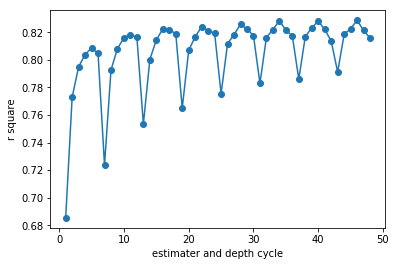

maximum r_sq: 0.8287302619301229


In [32]:
## Gradient Boosting: Hyperparameter  tuning 
n_space = np.arange(4,12,1)
depth_space = np.arange(1,7,1)
#learning_space = np.arange(0.1,1,0.2)
r_sq = []
for n in n_space:
    for depth in depth_space:
        #for learning in with optimum learning rate 0.4:
        params = {'n_estimators': n, 'max_depth': depth, 'learning_rate': 0.4, 'criterion': 'mse'}
        gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
        gradient_boosting_regressor.fit(X_train, y_train)
        fitted = gradient_boosting_regressor.predict(X_train)
        residual = fitted - y_train
        r_sq.append(gradient_boosting_regressor.score(X_test, y_test)) 
        #print("R^2: {}".format(gradient_boosting_regressor.score(X_test, y_test)))
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        #print('depth, estimator, r^2', depth, n, gradient_boosting_regressor.score(X_test, y_test))
#print("R^2:", r_sq)
xi = np.arange(1, len(r_sq)+1)
plt.plot(xi, r_sq, marker='o')
plt.xlabel('estimater and depth cycle')
plt.ylabel('r square')
plt.show()
print('maximum r_sq:', max(r_sq))

In [33]:
# gradient boosting with optimum parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
params = {
    'n_estimators': 10,
    'max_depth': 5,
    'learning_rate': 0.4,
    'criterion': 'mse',
    'loss': 'huber'
}

steps = [('scaler', StandardScaler()),
         ('GBreg', ensemble.GradientBoostingRegressor(**params))]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create a regression object:
GBreg = ensemble.GradientBoostingRegressor(**params)
fitted = pipeline.fit(X_train, y_train)
y_fitted = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

# metrics
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y_test)
print("Root Mean Squared Error: {}".format(rmse_gb))

# residual distribution for the whole training set
y_fitted_gb = pipeline.predict(X)
residual_gb = y_fitted_gb - y
corr_gb = np.corrcoef(y_fitted_gb, y)
print("correlation coeficient", corr_gb[0,1])


# prediction on unseen dataset: 2008 - 2012
y_target_gb = pipeline.predict(X_target)


Root Mean Squared Error: 0.19205707701163674
correlation coeficient 0.9340780871390887


## Random Forest

In [34]:
# random forst
params = {'n_estimators': 1500, 'criterion': 'mse'}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
steps = [('scaler', StandardScaler()), ('rf', ensemble.RandomForestRegressor(**params))]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create a regression object:
rf = RandomForestRegressor(n_estimators = 15, random_state = 42)

fitted = pipeline.fit(X_train, y_train)
y_fitted = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

# metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y_test)
print("Root Mean Squared Error: {}".format(rmse_rf))

# residual distribution for the whole training set
y_fitted_rf = pipeline.predict(X)
residual_rf = y_fitted_rf - y
corr_rf = np.corrcoef(y_fitted_rf, y)
print("correlation coeficient", corr_rf[0,1])


# prediction on unseen dataset 2008 - 2012
y_target_rf = pipeline.predict(X_target)

Root Mean Squared Error: 0.18973278363932683
correlation coeficient 0.9673197746173011


## Compare linear regression, gradient boosting, and random forest using all features

In [13]:
print('Normalized root mean square error:')
print('linear regression:', rmse_lr) 
print('gradient boosting:', rmse_gb) 
print('random forest:', rmse_rf)

Normalized root mean square error:
linear regression: 0.19124220227513045
gradient boosting: 0.19208568595157732
random forest: 0.1898739781686764


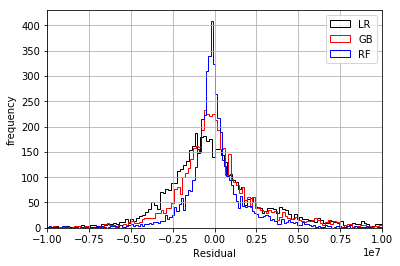

In [35]:
# residual distribution for the whole training set
fig, ax = plt.subplots()

ax.hist(residual_lr, bins=200, color="black", label='LR', histtype='step')
ax.hist(residual_gb, bins=200, color="red", label='GB', histtype='step')
ax.hist(residual_rf, bins=200, color="blue", label='RF', histtype='step')
ax.set_xlabel('Residual')
ax.set_ylabel('frequency')
ax.legend(loc='upper right')
ax.grid(True)
ax.set_xlim(-10000000, 10000000)
plt.rcParams["figure.figsize"] = [8,4]

plt.show()


In case of random forest residuals are more closely distributed to 0. This is an improvement. 

## Can we reduce the dimension effectively?

We observed that the radiative fluxes are strongly related to the the solar energy, so we will first use them as training features and examine how the RMSE is affected.

In [21]:
# working with less number of variables
# prepareing the train dataset
# linear regression after scaled input dataset and pipeline
x = pd.concat([dswrfs, dlwrfs, uswrfs, ulwrfs, ulwrf], axis=1)
X = x.values
y0 = target['ACME']
y = y0.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
steps = [('scaler', StandardScaler()),
         ('linreg', LinearRegression())]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create a linear regression object: reg
reg = LinearRegression()
fitted = pipeline.fit(X_train, y_train)
y_fit_trn_lr = pipeline.predict(X_train)
y_pred_tst_lr = pipeline.predict(X_test)

# metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_tst_lr))/np.mean(y_test)
print("Root Mean Squared Error: {}".format(rmse_lr))

# residual distribution for the whole training set
y_fitted_lr = pipeline.predict(X)
residual_lr = y_fitted_lr - y
corr_lr = np.corrcoef(y_fitted_lr, y)
print("correlation coeficient", corr_lr[0,1])

Root Mean Squared Error: 0.20067078090850315
correlation coeficient 0.9010696725431523


In [25]:
# gradient boosting with optimum parameters
x = pd.concat([dswrfs, dlwrfs, uswrfs, ulwrfs, ulwrf], axis=1)
X = x.values
y0 = target['ACME']
y = y0.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
steps = [('scaler', StandardScaler()),
         ('GBreg', ensemble.GradientBoostingRegressor(**params))]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

params = {
    'n_estimators': 10,
    'max_depth': 5,
    'learning_rate': 0.4,
    'criterion': 'mse'
}
# Create a regression object:
gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)

fitted = pipeline.fit(X_train, y_train)
y_fit_trn_gb = pipeline.predict(X_train)
y_pred_tst_gb = pipeline.predict(X_test)

# metrics
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y_test)
print("Root Mean Squared Error: {}".format(rmse_gb))

# residual distribution for the whole training set
y_fitted_gb = pipeline.predict(X)
residual_gb = y_fitted_gb - y
corr_gb = np.corrcoef(y_fitted_gb, y)
print("correlation coeficient", corr_gb[0,1])

Root Mean Squared Error: 0.20866063028697976
correlation coeficient 0.9027158081563376


In [26]:
# random forst
x = pd.concat([dswrfs, dlwrfs, uswrfs, ulwrfs, ulwrf], axis=1)
X = x.values
y0 = target['ACME']
y = y0.values

params = {'n_estimators': 15, 'criterion': 'mse'}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
steps = [('scaler', StandardScaler()), ('rf', ensemble.RandomForestRegressor(**params))]
# Create the pipeline: pipeline
pipeline = Pipeline(steps)


# Create a regression object:
rf = RandomForestRegressor(n_estimators = 15, random_state = 42)

fitted = pipeline.fit(X_train, y_train)
y_fitted = pipeline.predict(X_train)
y_pred = pipeline.predict(X_test)

# metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y_test)
print("Root Mean Squared Error: {}".format(rmse_rf))

# residual distribution for the whole training set
y_fitted_rf = pipeline.predict(X)
residual_rf = y_fitted_rf - y
corr_rf = np.corrcoef(y_fitted_rf, y)
print("correlation coeficient", corr_rf[0,1])

Root Mean Squared Error: 0.20888533896139905
correlation coeficient 0.9583187931922994


## Compare Linear regression, gradient boosting, and random forest using reduced features

In [26]:
print('Root mean square error:')
print('Using linear regression:', rmse_lr)
print('Using gradient boosting:', rmse_gb)
print('Using random forest:', rmse_rf)

Root mean square error:
Using linear regression: 0.20067078090850315
Using gradient boosting: 0.19412658873624036
Using random forest: 0.20137459847341602


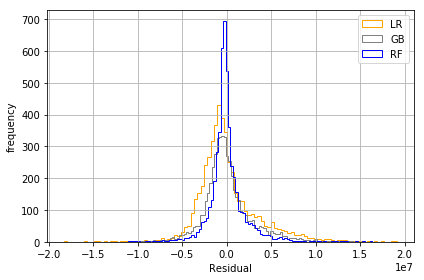

In [27]:
fig, ax = plt.subplots()
ax.hist(residual_lr, bins=100, color="orange", label='LR', histtype='step')
ax.hist(residual_gb, bins=100, color="gray", label='GB', histtype='step')
ax.hist(residual_rf, bins=100, color="blue", label='RF', histtype='step')
ax.set_xlabel('Residual')
ax.set_ylabel('frequency')
ax.legend(loc='upper right')
ax.grid(True)
fig.tight_layout()
plt.rcParams["figure.figsize"] = [6,4]
plt.show()


## Discussion
The model works effectively using only the radiative flux data. So we can essentially use only those features for solar energy prediction. Also as the accuracy from all the algorithms are similar we choose linear regression as the final algorithm for predicting solar energy